In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt

df_policies = pd.read_csv("../data/climate_policy_database_policies_export.csv")

# drop unused columns
df_policies = df_policies.drop(columns=[
    "policy_id", 
    "policy_name", 
    "supranational_region", 
    "subnational_region", 
    "policy_city_or_local",
    # "policy_description",
    "stringency",
    "high_impact",
    "reference",
    "last_update",
    "impact_indicators.comments",
    "impact_indicators.name",
    "impact_indicators.value",
    "impact_indicators.base_year",
    "impact_indicators.target_year"
])

# function to convert string to list
def string_to_list(cell):
    return cell.split(",")

# convert string to list
df_policies["policy_instrument"] = df_policies["policy_instrument"].apply(string_to_list)
df_policies["sector"] = df_policies["sector"].apply(string_to_list)
df_policies["policy_type"] = df_policies["policy_type"].apply(string_to_list)
df_policies["policy_objective"] = df_policies["policy_objective"].apply(string_to_list)

# fill na
df_policies['start_date'] = df_policies['start_date'].fillna(df_policies['decision_date'])
df_policies['end_date'] = df_policies['end_date'].fillna(pd.Timestamp('now').year)
df_policies = df_policies.dropna(subset='start_date')

# load mapping region
df_region = pd.read_csv("../data/region_mapping.csv")
df_region.head()

# merge region
df_policies = df_policies.merge(df_region, left_on='country_iso', right_on='alpha-3', how='left')
print(f"Number of policies: {len(df_policies)}")
df_policies.head()

Number of policies: 6247


,country_iso,country_update,policy_title,jurisdiction,country,policy_instrument,sector,policy_description,policy_type,policy_status,...,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,ARE,Annual,National Hydrogen Strategy United Arab Emirate...,Country,United Arab Emirates,"[Policy support, Strategic planning]","[Electricity and heat, Industry, Transport]",The National Hydrogen Strategy 2050 aims to su...,[Other low-carbon technologies and fuel switch],In force,...,AE,ARE,784.0,ISO 3166-2:AE,Asia,Western Asia,NaN,142.0,145.0,NaN
1,KAZ,Annual,Environmental Code Kazakhstan (2021),Country,Kazakhstan,"[Regulatory Instruments, Obligation schemes]",[General],The code regulates activities which may have a...,[Energy service demand reduction and resource ...,In force,...,KZ,KAZ,398.0,ISO 3166-2:KZ,Asia,Central Asia,NaN,142.0,143.0,NaN
2,FRA,Sporadic,"Energy Policy Framework (POPE, No. France (2005)",Country,France,"[RD&D funding, Tax relief, White certificate...","[Buildings, General, Industry]",• Reduce energy intensity by 2% annually betwe...,[Energy service demand reduction and resource ...,In force,...,FR,FRA,250.0,ISO 3166-2:FR,Europe,Western Europe,NaN,150.0,155.0,NaN
3,BTN,Annual,Electricity Act Bhutan (2001),Country,Bhutan,"[Policy support, Institutional creation, Str...",[Electricity and heat],NaN,"[Energy efficiency, Renewables]",In force,...,BT,BTN,64.0,ISO 3166-2:BT,Asia,Southern Asia,NaN,142.0,34.0,NaN
4,CAN,Annual,GHGs Formally Designated as Pollutants Canada ...,Country,Canada,[Regulatory Instruments],[General],NaN,[Energy service demand reduction and resource ...,In force,...,CA,CAN,124.0,ISO 3166-2:CA,Americas,Northern America,NaN,19.0,21.0,NaN


In [21]:
# import datetime

# # Function to create a range of years from start_date to end_date,
# # handling NaN values, end_date = 0, and ensuring it doesn't exceed the current year
# def create_year_range(row):
#     current_year = datetime.datetime.now().year
#     if pd.isna(row['start_date']) or pd.isna(row['end_date']) or row['end_date'] == 0:
#         return []
#     start_year = int(row['start_date'])
#     end_year = min(int(row['end_date']), current_year)  # Limit the end year to the current year
#     if start_year > end_year:  # Also check if start year is greater than end year
#         return []
#     return list(range(start_year, end_year + 1))

# # Apply the function to each row
# df_policies['active_years'] = df_policies.apply(create_year_range, axis=1)

# # Explode the 'active_years' list into multiple rows
# df_policies = df_policies.explode('active_years')

# # Drop rows where 'active_year' is NaN which results from empty lists or incorrect year ranges
# df_policies = df_policies.dropna(subset=['active_years'])

# # Rename the column for clarity and convert 'active_year' to integer
# df_policies.rename(columns={'active_years': 'active_year'}, inplace=True)
# df_policies['active_year'] = df_policies['active_year'].astype(int)

# # Display the first few rows to verify
# df_policies.head()

In [22]:
# Define the sector groupings
sector_group_mapping = {
    'Electricity and heat': 'Energy Production and Supply',
    'Renewables': 'Energy Production and Supply',
    'Gas': 'Energy Production and Supply',
    'Coal': 'Energy Production and Supply',
    'Nuclear': 'Energy Production and Supply',
    'Oil': 'Energy Production and Supply',
    'Fossil fuel exploration and production': 'Energy Production and Supply',
    
    'Transport': 'Transportation',
    'Light-duty vehicles': 'Transportation',
    'Low-emissions mobility': 'Transportation',
    'Heavy-duty vehicles': 'Transportation',
    'Shipping': 'Transportation',
    'Rail': 'Transportation',
    'Air': 'Transportation',
    
    'Buildings': 'Buildings and Infrastructure',
    'Appliances': 'Buildings and Infrastructure',
    'Heating and cooling': 'Buildings and Infrastructure',
    'Hot water and cooking': 'Buildings and Infrastructure',
    'Construction': 'Buildings and Infrastructure',
    
    'Industry': 'Industrial Processes',
    'Industrial energy related': 'Industrial Processes',
    'Industrial process CO2': 'Industrial Processes',
    'Industrial N2O': 'Industrial Processes',
    
    'Agriculture and forestry': 'Agriculture and Forestry',
    'Forestry': 'Agriculture and Forestry',
    'Agricultural CH4': 'Agriculture and Forestry',
    'Agricultural CO2': 'Agriculture and Forestry',
    'Agricultural N2O': 'Agriculture and Forestry',
    
    'Waste CH4': 'Waste Management',
    
    'Fluorinated gases': 'Emission Reduction Technologies',
    'CCS': 'Emission Reduction Technologies',
    'Negative emissions': 'Emission Reduction Technologies',
    
    'General': 'General'
}

exploded = df_policies.explode("sector")
exploded["sector"] = exploded["sector"].str.strip()

# Map sectors to their respective groups
exploded["sector_group"] = exploded["sector"].map(sector_group_mapping)

# Display the grouped sectors and their counts
sector_group_counts = exploded["sector_group"].value_counts()

# Display the resulting DataFrame for verification
print(sector_group_counts)

sector_group
Energy Production and Supply       3586
Transportation                     2101
Buildings and Infrastructure       1842
General                            1708
Industrial Processes               1067
Agriculture and Forestry            829
Emission Reduction Technologies     220
Waste Management                     48
Name: count, dtype: int64


In [23]:
# Define the policy instrument groupings
policy_instrument_group_mapping = {
    # Support and Strategic Measures
    'Policy support': 'Support and Strategic Measures',
    'Strategic planning': 'Support and Strategic Measures',
    'Institutional creation': 'Support and Strategic Measures',
    'Monitoring': 'Support and Strategic Measures',
    'Infrastructure investments': 'Support and Strategic Measures',
    'Funds to sub-national governments': 'Support and Strategic Measures',
    'Advice or aid in implementation': 'Support and Strategic Measures',
    'Professional training and qualification': 'Support and Strategic Measures',
    'Negotiated agreements (public-private sector)': 'Support and Strategic Measures',
    'Voluntary approaches': 'Support and Strategic Measures',
    'Public voluntary schemes': 'Support and Strategic Measures',
    'Unilateral commitments (private sector)': 'Support and Strategic Measures',
    'Auditing': 'Support and Strategic Measures',
    'Barrier removal': 'Support and Strategic Measures',
    'Removal of split incentives (landlord tenant problem)': 'Support and Strategic Measures',

    # Regulatory Instruments
    'Codes and standards': 'Regulatory Instruments',
    'Sectoral standards': 'Regulatory Instruments',
    'Building codes and standards': 'Regulatory Instruments',
    'Product standards': 'Regulatory Instruments',
    'Industrial air pollution standards': 'Regulatory Instruments',
    'Vehicle fuel-economy and emissions standards': 'Regulatory Instruments',
    'Vehicle air pollution standards': 'Regulatory Instruments',
    'Procurement rules': 'Regulatory Instruments',
    'Other mandatory requirements': 'Regulatory Instruments',
    'Obligation schemes': 'Regulatory Instruments',
    'Grid access and priority for renewables': 'Regulatory Instruments',
    'Feed-in tariffs or premiums': 'Regulatory Instruments',
    'Regulatory Instruments': 'Regulatory Instruments',
    'User charges': 'Regulatory Instruments',

    # Economic Instruments
    'Economic instruments': 'Economic Instruments',
    'Grants and subsidies': 'Economic Instruments',
    'Fiscal or financial incentives': 'Economic Instruments',
    'Tax relief': 'Economic Instruments',
    'Energy and other taxes': 'Economic Instruments',
    'Loans': 'Economic Instruments',
    'Direct investment': 'Economic Instruments',
    'Market-based instruments': 'Economic Instruments',
    'GHG emission reduction crediting and offsetting mechanism': 'Economic Instruments',
    'GHG emissions allowances': 'Economic Instruments',
    'White certificates': 'Economic Instruments',
    'Green certificates': 'Economic Instruments',
    'CO2 taxes': 'Economic Instruments',
    'Retirement premium': 'Economic Instruments',
    'Net metering': 'Economic Instruments',
    'Removal of fossil fuel subsidies': 'Economic Instruments',
    'Tendering schemes': 'Economic Instruments',

    # Targets and Commitments
    'Renewable energy target': 'Targets and Commitments',
    'Energy efficiency target': 'Targets and Commitments',
    'GHG reduction target': 'Targets and Commitments',
    'Formal & legally binding renewable energy target': 'Targets and Commitments',
    'Formal & legally binding energy efficiency target': 'Targets and Commitments',
    'Formal & legally binding GHG reduction target': 'Targets and Commitments',
    'Political & non-binding renewable energy target': 'Targets and Commitments',
    'Political & non-binding energy efficiency target': 'Targets and Commitments',
    'Political & non-binding GHG reduction target': 'Targets and Commitments',
    'Climate strategy': 'Targets and Commitments',
    'Formal & legally binding climate strategy': 'Targets and Commitments',
    'Target': 'Targets and Commitments',
    'Political & non-binding climate strategy': 'Targets and Commitments',

    # Research, Development, and Innovation
    'Research & Development and Deployment (RD&D)': 'Research, Development, and Innovation',
    'RD&D funding': 'Research, Development, and Innovation',
    'Research programme': 'Research, Development, and Innovation',
    'Technology development': 'Research, Development, and Innovation',
    'Technology deployment and diffusion': 'Research, Development, and Innovation',
    'Demonstration project': 'Research, Development, and Innovation',

    # Information and Education
    'Information and education': 'Information and Education',
    'Information provision': 'Information and Education',
    'Performance label': 'Information and Education',
    'Endorsement label': 'Information and Education',
    'Comparison label': 'Information and Education'
}

exploded = exploded.explode("policy_instrument")
exploded["policy_instrument"] = exploded["policy_instrument"].str.strip()

# Map sectors to their respective groups
exploded["policy_instrument_group"] = exploded["policy_instrument"].map(policy_instrument_group_mapping)

# Display the grouped sectors and their counts
policy_instrument_group_counts = exploded["policy_instrument_group"].value_counts()

# Display the resulting DataFrame for verification
print(policy_instrument_group_counts)

policy_instrument_group
Support and Strategic Measures           7413
Targets and Commitments                  5562
Economic Instruments                     5438
Regulatory Instruments                   5183
Research, Development, and Innovation    1798
Information and Education                1653
Name: count, dtype: int64


In [27]:
exploded.head()

,country_iso,country_update,policy_title,jurisdiction,country,policy_instrument,sector,policy_description,policy_type,policy_status,...,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code,sector_group,policy_instrument_group
0,ARE,Annual,National Hydrogen Strategy United Arab Emirate...,Country,United Arab Emirates,Policy support,Electricity and heat,The National Hydrogen Strategy 2050 aims to su...,[Other low-carbon technologies and fuel switch],In force,...,784.0,ISO 3166-2:AE,Asia,Western Asia,NaN,142.0,145.0,NaN,Energy Production and Supply,Support and Strategic Measures
0,ARE,Annual,National Hydrogen Strategy United Arab Emirate...,Country,United Arab Emirates,Strategic planning,Electricity and heat,The National Hydrogen Strategy 2050 aims to su...,[Other low-carbon technologies and fuel switch],In force,...,784.0,ISO 3166-2:AE,Asia,Western Asia,NaN,142.0,145.0,NaN,Energy Production and Supply,Support and Strategic Measures
0,ARE,Annual,National Hydrogen Strategy United Arab Emirate...,Country,United Arab Emirates,Policy support,Industry,The National Hydrogen Strategy 2050 aims to su...,[Other low-carbon technologies and fuel switch],In force,...,784.0,ISO 3166-2:AE,Asia,Western Asia,NaN,142.0,145.0,NaN,Industrial Processes,Support and Strategic Measures
0,ARE,Annual,National Hydrogen Strategy United Arab Emirate...,Country,United Arab Emirates,Strategic planning,Industry,The National Hydrogen Strategy 2050 aims to su...,[Other low-carbon technologies and fuel switch],In force,...,784.0,ISO 3166-2:AE,Asia,Western Asia,NaN,142.0,145.0,NaN,Industrial Processes,Support and Strategic Measures
0,ARE,Annual,National Hydrogen Strategy United Arab Emirate...,Country,United Arab Emirates,Policy support,Transport,The National Hydrogen Strategy 2050 aims to su...,[Other low-carbon technologies and fuel switch],In force,...,784.0,ISO 3166-2:AE,Asia,Western Asia,NaN,142.0,145.0,NaN,Transportation,Support and Strategic Measures


In [28]:
df = exploded[['country_iso', 'policy_title', 'country', 'policy_instrument', 'sector', 'sector_group', 'policy_instrument_group', 'start_date']]
# df.to_csv('temp.csv', index=False)

In [29]:
df = df[df['sector_group'] != 'General']

In [33]:
import pandas as pd
from collections import Counter
import string
from nltk.corpus import stopwords

# Download the stopwords from NLTK if not already installed
import nltk
nltk.download('stopwords')

# Ensure columns are categorized correctly
df['sector_group'] = df['sector_group'].astype('category')

# Define the set of stop words
stop_words = set(stopwords.words('english'))

# Function to preprocess text: remove punctuation, convert to lowercase, and remove stop words
def preprocess_text(text):
    translator = str.maketrans('', '', string.punctuation)  # Translation table for removing punctuation
    text = text.translate(translator).lower()
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

# Prepare a list to store the table data
table_data = []

# Loop through each sector group to extract top words
for sector_group in sector_groups:
    # Filter the dataframe for the current sector group
    group_df = df[df['sector_group'] == sector_group]
    
    # Loop through each policy instrument group in the sector group
    for instrument_group in group_df['policy_instrument_group'].unique():
        # Filter the dataframe for the current policy instrument group
        group_instruments_df = group_df[group_df['policy_instrument_group'] == instrument_group]
        
        # Combine all policy instruments into a single string and preprocess the text
        instrument_text = " ".join(group_instruments_df['policy_instrument'].dropna().astype(str).values)
        processed_text = preprocess_text(instrument_text)
        
        # Count word frequencies
        word_freq = Counter(processed_text.split())
        
        # Get the top 5 words
        top_words = [word for word, count in word_freq.most_common(5)]
        
        # Add sector, instrument group, and top words to the table data
        table_data.append([sector_group, instrument_group, ", ".join(top_words)])

# Convert the list to a DataFrame for better display
table_df = pd.DataFrame(table_data, columns=['Sector', 'Instrument Group', 'Top 5 Words'])

# Display the DataFrame
print(table_df)

# Optionally, save the table as a CSV or other formats
table_df.to_csv('top_words_by_sector_and_instrument_group.csv', index=False)

                             Sector                       Instrument Group  \
0      Energy Production and Supply         Support and Strategic Measures   
1      Energy Production and Supply                Targets and Commitments   
2      Energy Production and Supply                   Economic Instruments   
3      Energy Production and Supply              Information and Education   
4      Energy Production and Supply  Research, Development, and Innovation   
5      Energy Production and Supply                 Regulatory Instruments   
6              Industrial Processes         Support and Strategic Measures   
7              Industrial Processes  Research, Development, and Innovation   
8              Industrial Processes                   Economic Instruments   
9              Industrial Processes              Information and Education   
10             Industrial Processes                 Regulatory Instruments   
11             Industrial Processes                Targets and C

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thamolwanp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


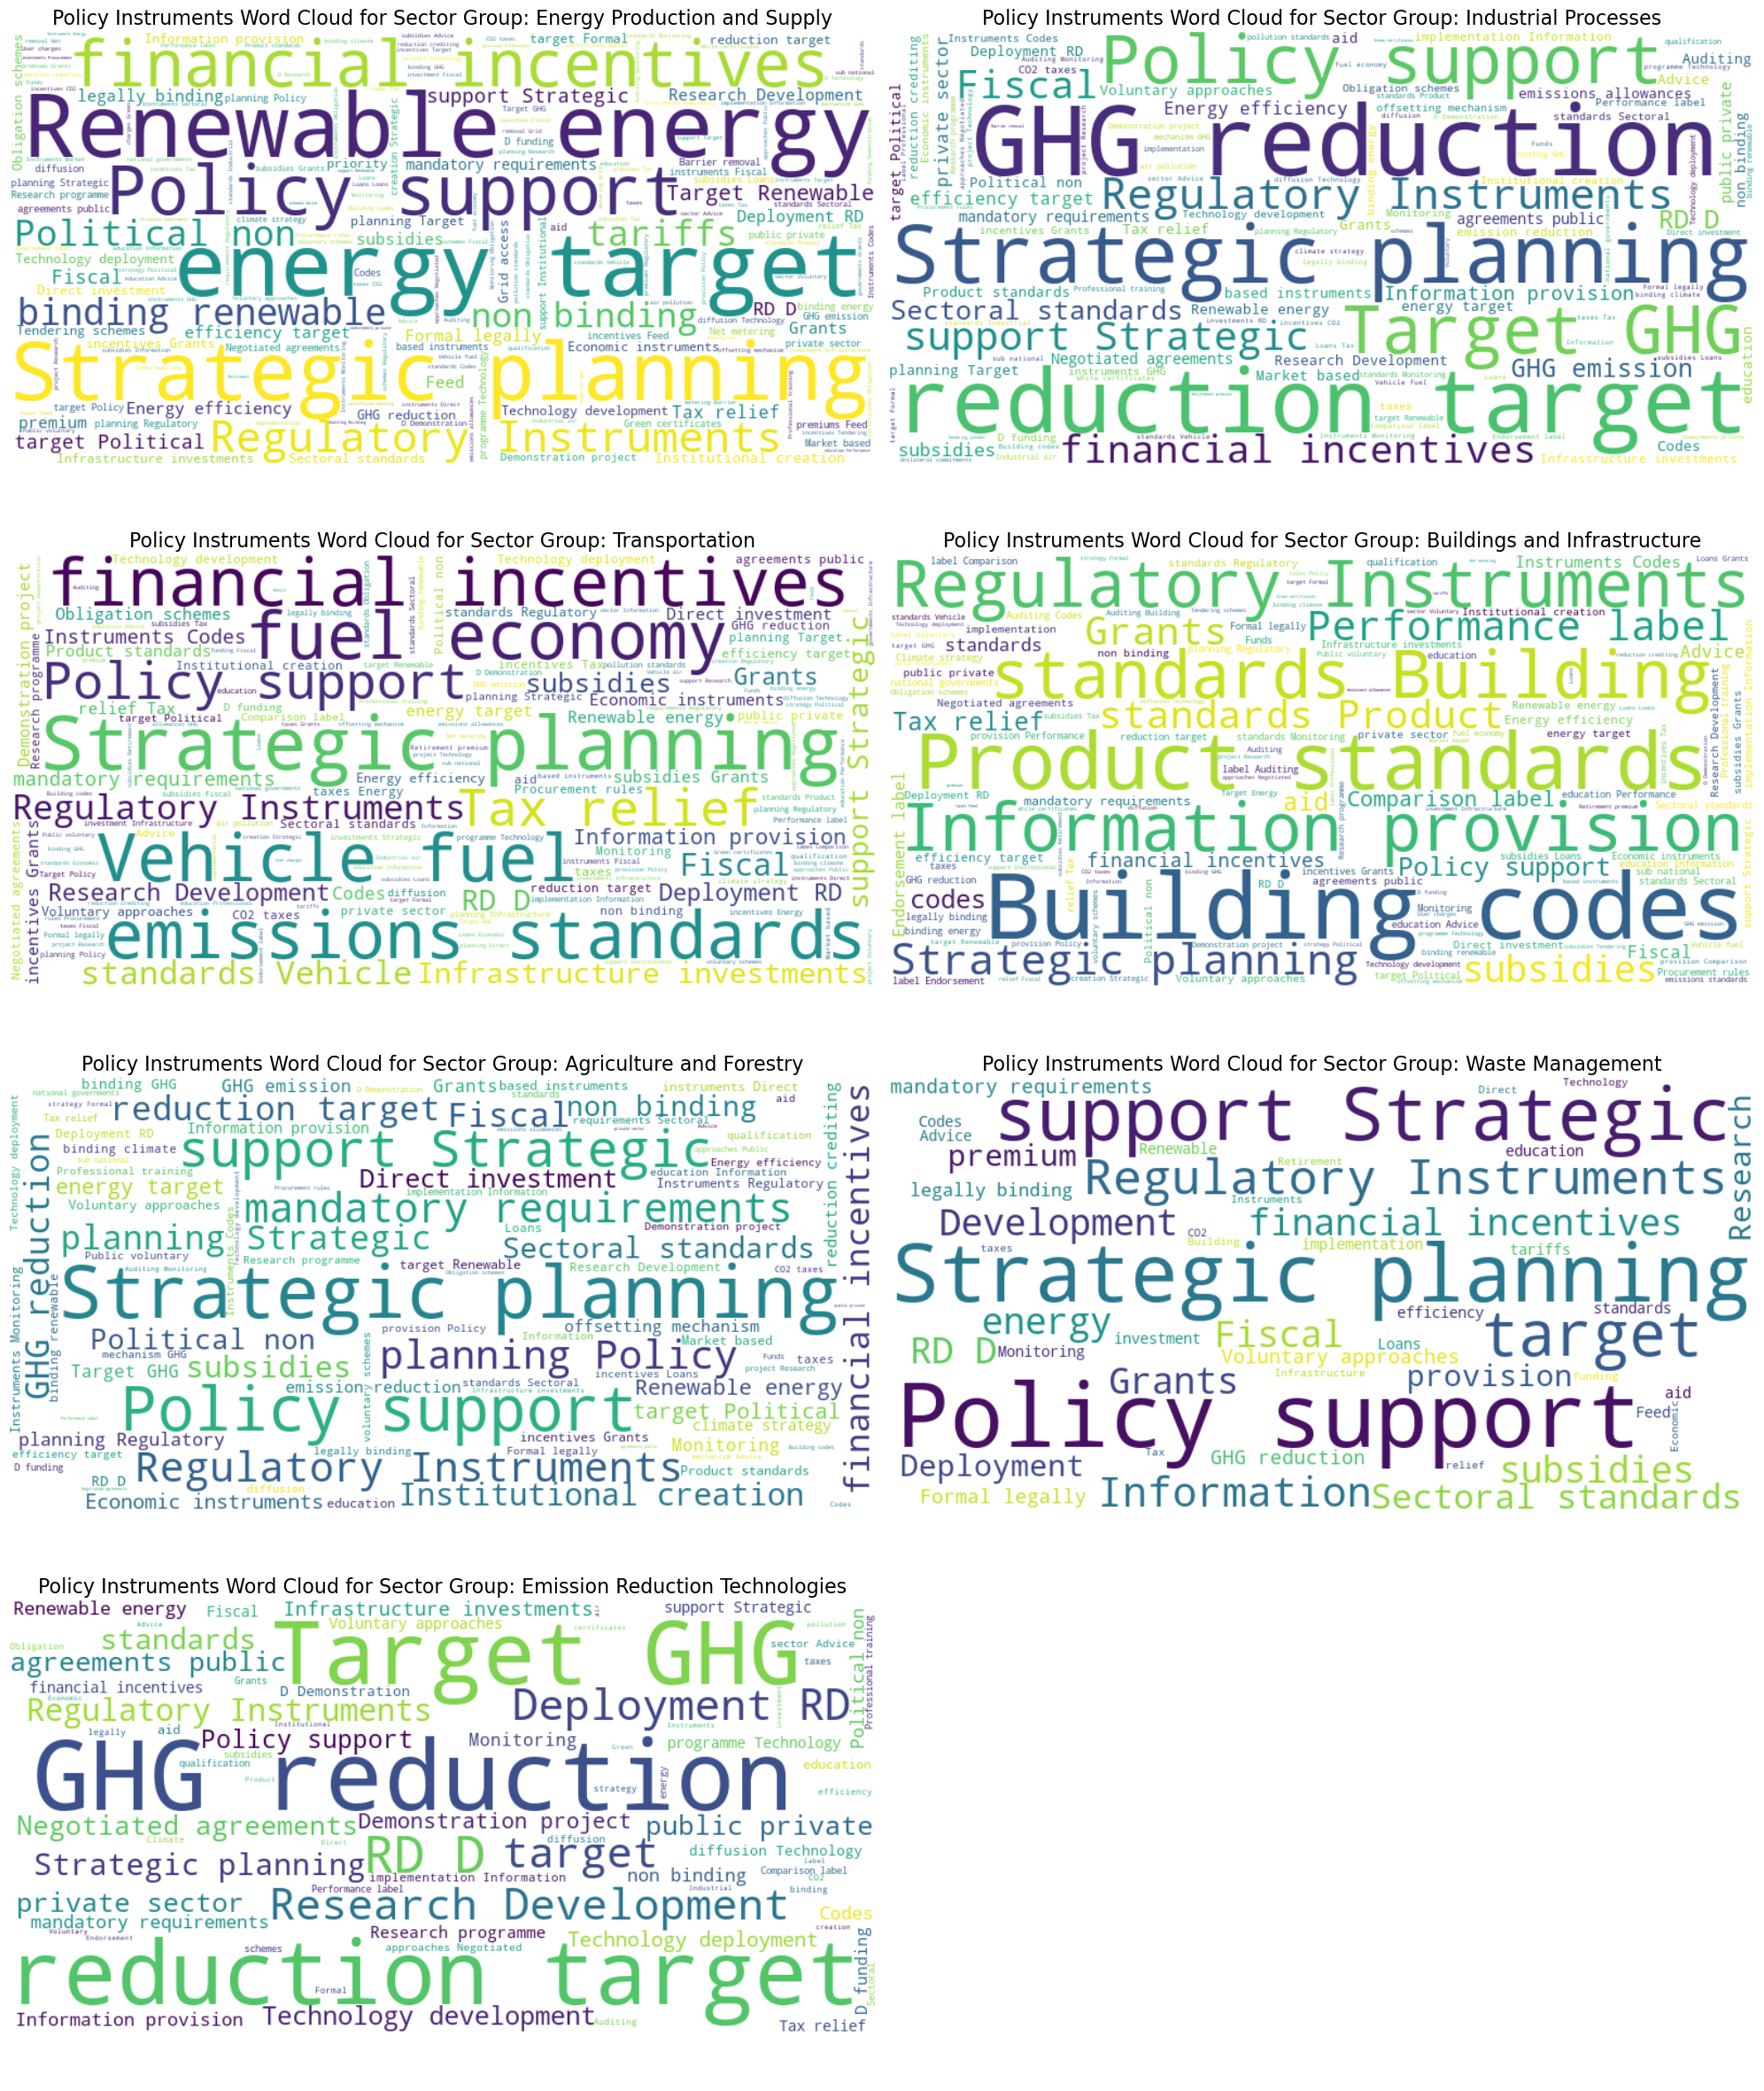

In [17]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import math

# Ensure columns are categorized correctly
df['sector_group'] = df['sector_group'].astype('category')

# Get the unique sector groups
sector_groups = df['sector_group'].unique()
n_sectors = len(sector_groups)

# Set up the subplot grid: 2 columns, calculate the number of rows needed
n_cols = 2
n_rows = math.ceil(n_sectors / n_cols)

# Create a figure for the subplots, dynamically adjusting the height
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 6 * n_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each sector group and generate the word cloud in subplots
for i, sector_group in enumerate(sector_groups):
    # Filter the dataframe for the current sector group
    group_df = df[df['sector_group'] == sector_group]
    
    # Combine all policy instruments into a single string
    text = " ".join(group_df['policy_instrument'].dropna().astype(str).values)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud in the corresponding subplot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Policy Instruments Word Cloud for Sector Group: {sector_group}', fontsize=16)
    axes[i].axis('off')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap and remove excess space
plt.tight_layout(pad=1.0, rect=[0, 0, 1, 1])  # Use tight_layout with padding and rect to control margins

# Save the figure
plt.savefig('./sector_group_wordclouds/wordclouds_subplot_adjusted_margins.png')

# Show the plot
plt.show()

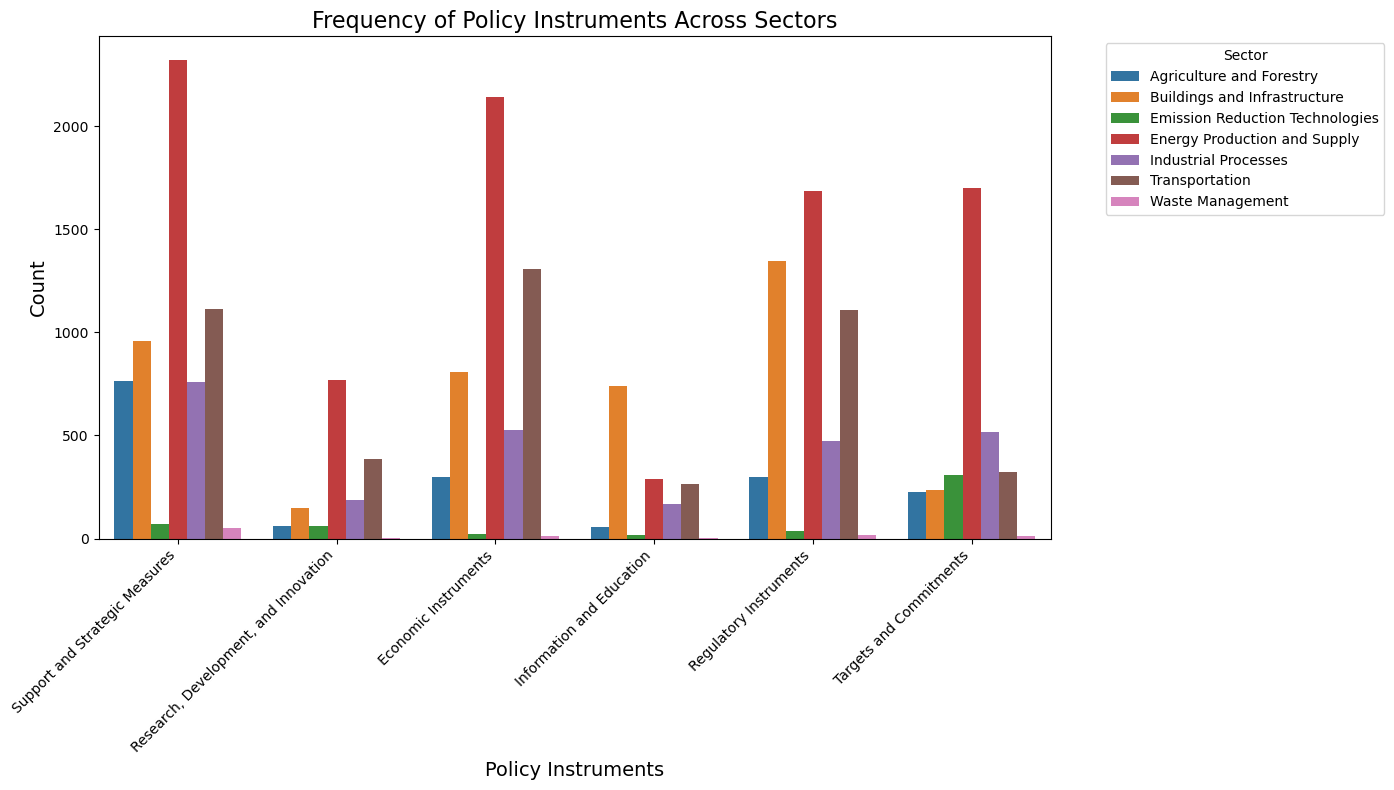

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot showing the frequency of policy instruments across sectors
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='policy_instrument_group', hue='sector_group')

# Set plot title and adjust labels
plt.title('Frequency of Policy Instruments Across Sectors', fontsize=16)
plt.xlabel('Policy Instruments', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Remove y-axis labels
# plt.yticks([])

# Adjust layout for better spacing
plt.tight_layout()

# Save the bar chart
plt.savefig('./policy_instrument_frequency_chart.png')

# Show the plot
plt.show()

In [9]:
import pandas as pd
import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(df['policy_instrument_group'], df['sector_group'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display the results
print("Chi-Square Test Results")
print("-----------------------")
print(f"Chi2 Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
d = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

# Interpretation
if p < 0.05:
    print("\nResult: The variation in policy instruments across sectors is statistically significant (p < 0.05).")
else:
    print("\nResult: The variation in policy instruments across sectors is not statistically significant (p >= 0.05).")

Chi-Square Test Results
-----------------------
Chi2 Statistic: 6532.203619257623
p-value: 0.0
Degrees of Freedom: 35

Expected Frequencies:

Result: The variation in policy instruments across sectors is statistically significant (p < 0.05).


In [10]:
d.to_csv('frequency.csv', index=False)

In [11]:
stats.chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=6532.203619257623, pvalue=0.0, dof=35, expected_freq=array([[ 343.60712833,  851.67922505,  104.34880024, 1790.41631235,
         891.48859393,  529.58524051,  905.56261323,   21.31208637],
       [ 104.44696269,  258.88667874,   31.71911857,  544.23651422,
         270.98761415,  160.97911044,  275.26572263,    6.47827855],
       [ 327.49462048,  811.7420786 ,   99.45565127, 1706.4596813 ,
         849.68469701,  504.75180242,  863.09875402,   20.3127149 ],
       [ 113.60897697,  281.59603653,   34.50149739,  591.97655932,
         294.7584575 ,  175.10008504,  299.41183865,    7.0465486 ],
       [ 468.40008134, 1160.9963397 ,  142.24671867, 2440.66865087,
        1215.263874  ,  721.92265316, 1234.44936592,   29.05231634],
       [ 351.44223019,  871.09964137,  106.72821385, 1831.24228195,
         911.81676341,  541.66110844,  926.21170555,   21.79805524]]))